In [147]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

import warnings
warnings.filterwarnings('ignore') #(Panopto, n.d.-d)

#load the dataset onto the notebook 
df = pd.read_csv('medical_clean.csv', index_col=0)

#check datafrme
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [148]:
#visually inspect df to facilitate exploration, spot problems
pd.set_option('display.max_columns', None)
df

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,4762,Urban,America/New_York,"Programmer, multimedia",2,25,45967.61,Widowed,Male,No,16.980860,4,2,1,No,Emergency Admission,Yes,No,Medium,No,No,No,No,No,Yes,No,Yes,No,Intravenous,51.561220,6850.942000,8927.642000,3,2,2,3,4,3,4,2
9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,1251,Urban,America/New_York,"Restaurant manager, fast food",4,87,14983.02,Widowed,Male,Yes,18.177020,5,0,0,No,Elective Admission,Yes,No,Medium,Yes,Yes,Yes,No,No,No,No,No,Yes,CT Scan,68.668240,7741.690000,28507.150000,3,3,4,2,5,3,4,4
9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,532,Rural,America/Chicago,"Psychologist, occupational",3,45,65917.81,Separated,Female,Yes,17.129070,4,2,0,Yes,Elective Admission,Yes,No,High,Yes,No,No,No,No,Yes,Yes,No,No,Intravenous,70.154180,8276.481000,15281.210000,3,3,3,4,4,2,3,2


In [149]:
#continuous variables to keep for the task
continuous_vars = ['Age', 'TotalCharge']

In [150]:
#drop all columns not in the list of continuous variables 
df = df[continuous_vars]

#display the remaining dataframe 
df

,Age,TotalCharge
CaseOrder,,
1,53,3726.702860
2,51,4193.190458
3,53,2434.234222
4,78,2127.830423
5,22,2113.073274
...,...,...
9996,25,6850.942000
9997,87,7741.690000
9998,45,8276.481000


In [151]:
#check duplicates
print(df.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [152]:
#detect missing values
df.isnull().sum()

Age            0
TotalCharge    0
dtype: int64

In [153]:
#check for outliers and remove
print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 2)
(10000, 2)


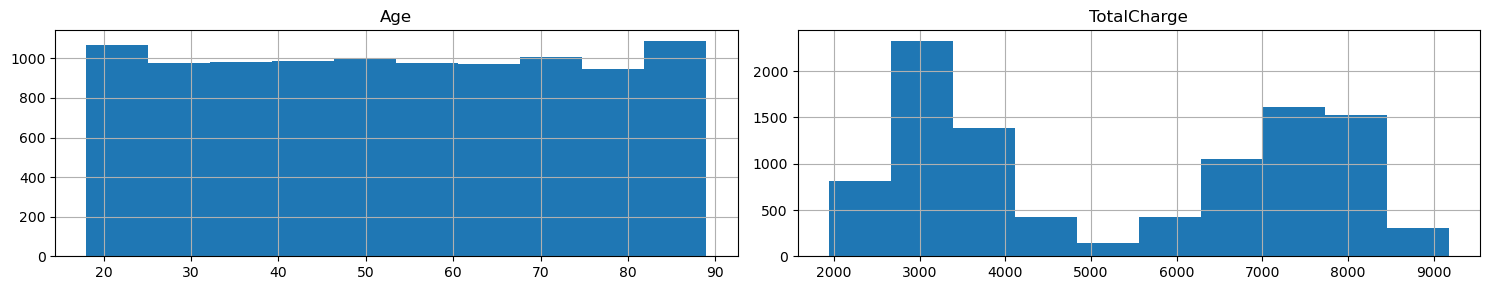

In [154]:
#create histograms for the variables
df.hist(figsize=(15, 3), layout=(1, 2)) 

#display the histograms
plt.tight_layout()
plt.show()

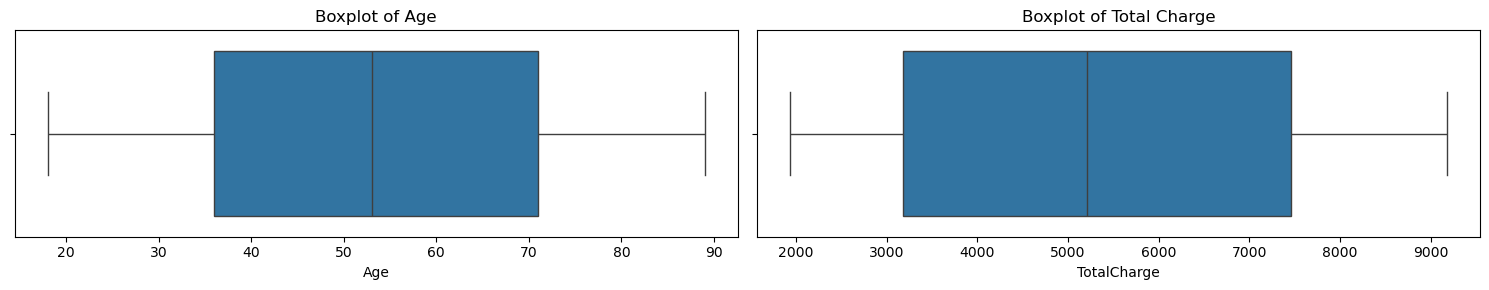

In [155]:
#create a figure with two subplots, arranged in a row
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 3))

#create boxplot for Age
sns.boxplot(ax=axes[0], x='Age', data=df)
axes[0].set_title('Boxplot of Age')

#create boxplot for TotalCharge
sns.boxplot(ax=axes[1], x='TotalCharge', data=df)
axes[1].set_title('Boxplot of Total Charge')

plt.tight_layout()
plt.show()


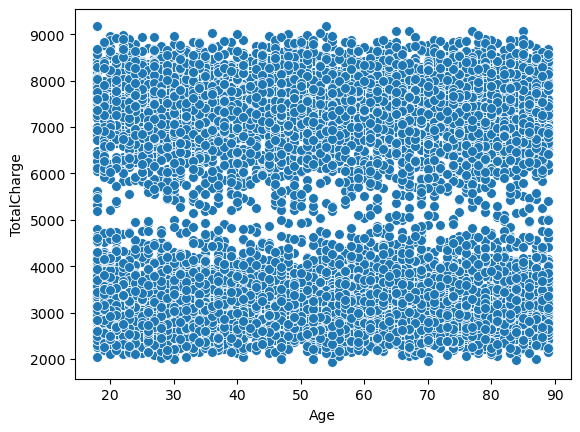

In [156]:
#create a scattreplot for Age and TotalCharge to see if there is correlation between them
ax=sns.scatterplot(data=df,
                   x='Age',
                   y='TotalCharge',
                   s=50)               

In [157]:
#get statistics for Age and TotalCharge
df.describe().round(2)

,Age,TotalCharge
count,10000.00,10000.00
mean,53.51,5312.17
std,20.64,2180.39
min,18.00,1938.31
25%,36.00,3179.37
50%,53.00,5213.95
75%,71.00,7459.70
max,89.00,9180.73


In [158]:
#standatdize the varables
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df)

#create a new dataframe, scaled_df, from the scaled data
scaled_df = pd.DataFrame(scaled_data, columns=df.columns)

scaled_df


,Age,TotalCharge
0,-0.024795,-0.727185
1,-0.121706,-0.513228
2,-0.024795,-1.319983
3,1.186592,-1.460517
4,-1.526914,-1.467285
...,...,...
9995,-1.381548,0.705765
9996,1.622691,1.114312
9997,-0.412438,1.359597
9998,-0.509349,1.069727


In [159]:
#get statistics for standardized Age and TotalCharge
scaled_df.describe().round(2)

,Age,TotalCharge
count,10000.00,10000.00
mean,0.00,0.00
std,1.00,1.00
min,-1.72,-1.55
25%,-0.85,-0.98
50%,-0.02,-0.05
75%,0.85,0.98
max,1.72,1.77


In [160]:
#save cleaned dataset to a csv file 
df.to_csv('D212_task1.csv')

In [161]:
#save scaled_df to a csv file 
scaled_df.to_csv('D212_task1_scaled.csv')

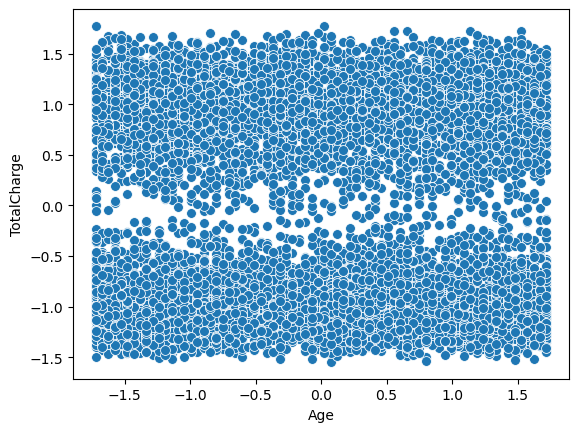

In [162]:
#create a scattreplot for standardized data see if there are clusters
ax=sns.scatterplot(data=scaled_df,
                   x='Age',
                   y='TotalCharge',
                   s=50)

In [163]:
# Instantiate the KMeans model with 2 clusters
k_model = KMeans(n_clusters=2, n_init=25, random_state=300)

# Fit the KMeans model
k_model.fit(scaled_df)

KMeans(n_clusters=2, n_init=25, random_state=300)

In [164]:
# calculate cluster distribution
evaluate = pd.Series(k_model.labels_).value_counts()
print("Cluster distribution:")
print(evaluate)

Cluster distribution:
0    5023
1    4977
Name: count, dtype: int64


In [165]:
#calculate centroids
centroid = pd.DataFrame(k_model.cluster_centers_,
                        columns = df.columns)
centroid

,Age,TotalCharge
0,-0.015526,-0.942836
1,0.015676,0.951931


In [166]:
#calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df, k_model.labels_)

#print the silhouette score
print(f"Silhouette Score for 2 clusters: {silhouette_avg}")



Silhouette Score for 2 clusters: 0.4498105432144045


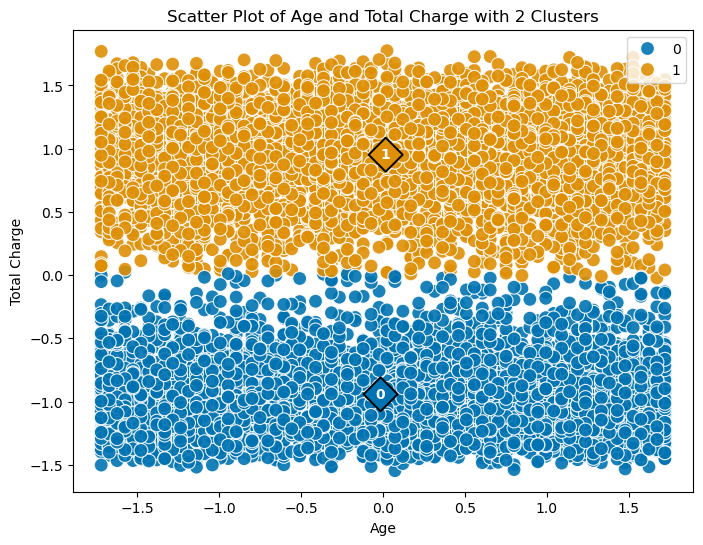

In [167]:
#visualizate centroids
plt.figure(figsize=(8, 6))

ax = sns.scatterplot(data=scaled_df,
                     x='Age',
                     y='TotalCharge',
                     hue=k_model.labels_,
                     palette='colorblind',
                     alpha=0.9,
                     s=100,
                     legend=True)

#create scatter plot for centroids
ax = sns.scatterplot(data=centroid,
                     x='Age',
                     y='TotalCharge',
                     hue=centroid.index,
                     palette='colorblind',
                     s=300,
                     marker='D',
                     edgecolor='black',
                     legend=False)

#label the centroids
for i in range(len(centroid)):
    plt.text(x=centroid.Age[i],
             y=centroid.TotalCharge[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=10,
             weight='bold',
             color='white')

plt.title('Scatter Plot of Age and Total Charge with 2 Clusters')
plt.xlabel('Age')
plt.ylabel('Total Charge')
plt.show()


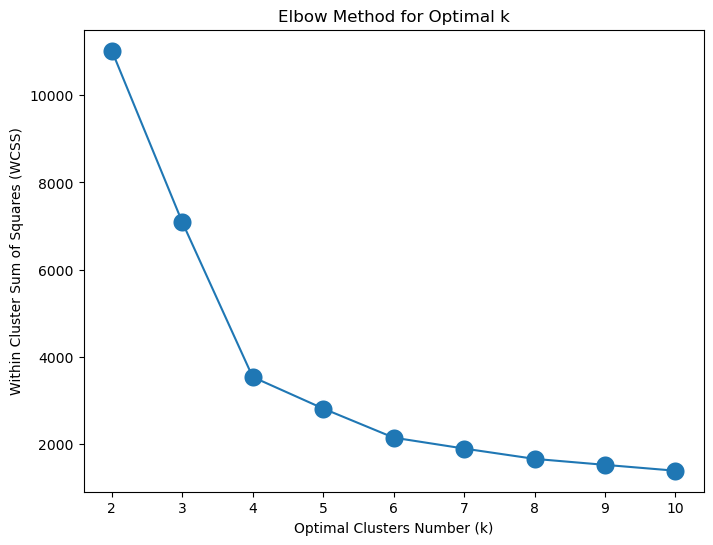

In [168]:
#calculate WCSS for different values of k
wcss = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, n_init=50, random_state=300)
    model.fit(scaled_df)
    wcss.append(model.inertia_)
wcss_s = pd.Series(wcss, index=range(2, 11))

#plot the elbow curve
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=wcss_s, x=wcss_s.index)
ax = sns.scatterplot(y=wcss_s, x=wcss_s.index, s=200)
ax.set(xlabel='Optimal Clusters Number (k)', ylabel='Within Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.show()


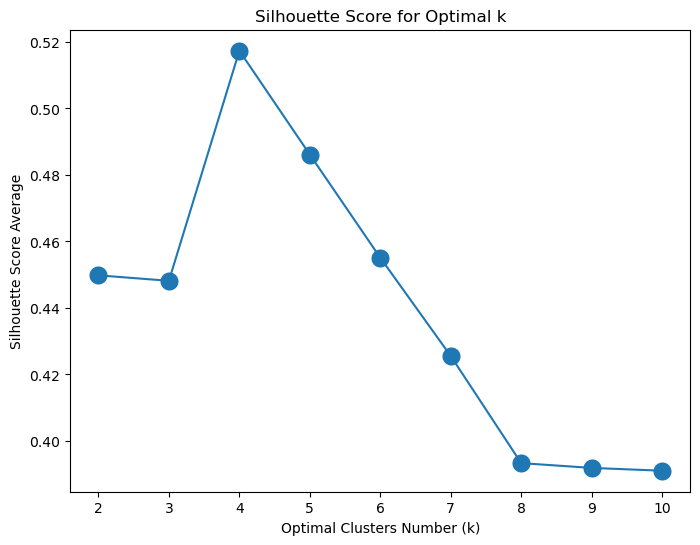

In [169]:
#calculate silhouette scores for different values of k
silhouette_scores = []
for k in range(2, 11):
    model = KMeans(n_clusters=k, n_init=25, random_state=300)
    model.fit(scaled_df)
    silhouette_scores.append(silhouette_score(scaled_df, model.labels_))

silhouette_scores_s = pd.Series(silhouette_scores, index=range(2, 11))

#plot the silhouette scores
plt.figure(figsize=(8, 6))
ax = sns.lineplot(y=silhouette_scores_s, x=silhouette_scores_s.index)
ax = sns.scatterplot(y=silhouette_scores_s, x=silhouette_scores_s.index, s=200)
ax.set(xlabel='Optimal Clusters Number (k)', ylabel='Silhouette Score Average')
plt.title('Silhouette Score for Optimal k')
plt.show()


In [170]:
#create final model with 4 clusters
Fin_model = KMeans(n_clusters=4, n_init=25, random_state=300)
Fin_model.fit(scaled_df)


KMeans(n_clusters=4, n_init=25, random_state=300)

In [171]:
#calculate the cluster centroids
centeroids = pd.DataFrame(Fin_model.cluster_centers_, columns=['Age', 'TotalCharge'])
centeroids

,Age,TotalCharge
0,-0.876624,-0.949330
1,-0.827985,0.949019
2,0.858038,-0.937422
3,0.898793,0.953832


In [172]:
#add the cluster labels to the original dataframe
df['Cluster'] = Fin_model.labels_

#count the number of data points in each cluster
cluster_counts = df['Cluster'].value_counts()

#display the counts
print("Cluster Distribution:\n", cluster_counts)


Cluster Distribution:
 Cluster
1    2551
0    2524
2    2497
3    2428
Name: count, dtype: int64


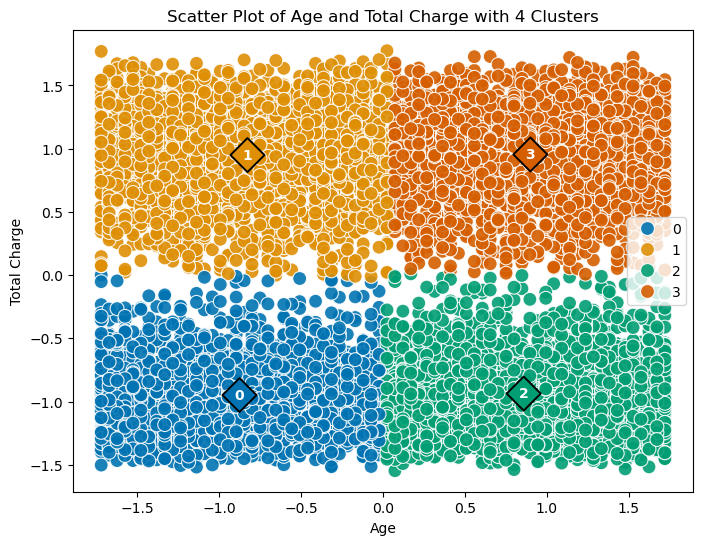

In [173]:

plt.figure(figsize=(8, 6))

ax = sns.scatterplot(data=scaled_df,
                     x='Age',
                     y='TotalCharge',
                     hue=Fin_model.labels_,
                     palette='colorblind',
                     alpha=0.9,
                     s=100,
                     legend=True)

#create scatter plot for centroids
ax = sns.scatterplot(data=centeroids,
                     x='Age',
                     y='TotalCharge',
                     hue=centeroids.index,
                     palette='colorblind',
                     s=300,
                     marker='D',
                     edgecolor='black',
                     legend=False)

#Label the centroids
for i in range(len(centeroids)):
    plt.text(x=centeroids.Age[i],
             y=centeroids.TotalCharge[i],
             s=i,
             horizontalalignment='center',
             verticalalignment='center',
             size=10,
             weight='bold',
             color='white')

#display the plot
plt.title('Scatter Plot of Age and Total Charge with 4 Clusters')
plt.xlabel('Age')
plt.ylabel('Total Charge')
plt.show()


In [174]:
#calculate the silhouette score
silhouette_avg = silhouette_score(scaled_df, Fin_model.labels_)

#print the silhouette score
print(f"Silhouette Score for 4 clusters: {silhouette_avg}")


Silhouette Score for 4 clusters: 0.5173499484191806


In [175]:
fin_inertia = Fin_model.inertia_

print(f"Inertia for 4 clusters: {fin_inertia}")

Inertia for 4 clusters: 3536.2764995521056
